In [59]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import plotly.express as px
import seaborn as sns

# 1. Importación datos Cammesa

In [4]:
data = pd.read_excel(r"../analisis_descriptivo/Consumo Mensual - Cammesa.xlsx")
data.columns = ['año', 'mes', 'agente_nemo', 'agente_descripcion', 'tipo_agente',
       'region', 'provincia', 'categoria_area', 'categoria_demanda', 'tarifa',
       'categoria_tarifa', 'demanda_mwh']
data.head()

,año,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_mwh
0,2012,2012-01-01,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2222.628
1,2012,2012-01-01,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,536.858
2,2012,2012-01-01,ACARSLSY,ASOC.COOP.ARG. - San Lorenzo,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,336.297
3,2012,2012-01-01,ACINROSY,ACINDAR ROSARIO EX-NAVARRO,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,601.066
4,2012,2012-01-01,ACINTBOY,ACINDAR PTA. TABLADA,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,3076.618


# 2. Generación de features (variables para entrenar el modelo)

In [10]:
# MES/AÑO - DEMANDA - DEMANDA GU - DEMANDA DI - CANTIDAD DE USUARIOS GU - CANTIDAD DE USUARIOS DI - TEMPERATURA MEDIA - EMAE - VALOR DOLAR

Gran Usuario    67016
Name: categoria_demanda, dtype: int64

## 2.1 Demanda total mensual

In [56]:
demanda_total = data.groupby('mes').demanda_mwh.sum()
demanda_total = demanda_total.to_frame().reset_index()
demanda_total['mes'] = pd.to_datetime(demanda_total['mes'])

# Create a new column for year-month
demanda_total['YearMonth'] = demanda_total['mes'].dt.to_period('M')

demanda_total.drop('mes', axis=1, inplace=True)

# Reorder columns
demanda_total = demanda_total[['YearMonth', 'demanda_mwh']]

# Group by 'YearMonth' and calculate some aggregate function (e.g., sum)
demanda_total = demanda_total.groupby('YearMonth')['demanda_mwh'].sum()
demanda_total = demanda_total.to_frame().reset_index()
demanda_total.columns = ['fecha', 'demanda_total']

demanda_total

,fecha,demanda_total
0,2012-01,1.080470e+07
1,2012-02,1.008555e+07
2,2012-03,1.017537e+07
3,2012-04,8.969068e+06
4,2012-05,9.597272e+06
...,...,...
135,2023-04,1.004620e+07
136,2023-05,1.081549e+07
137,2023-06,1.207183e+07
138,2023-07,1.247727e+07


## 2.2 Demanda Grandes Usuarios Mensual

In [18]:
#Generación del dataframe

demanda_gu = data[data['categoria_demanda'] == 'Gran Usuario']
demanda_gu = demanda_gu.groupby('mes').demanda_mwh.sum()
demanda_gu = demanda_gu.to_frame().reset_index()
demanda_gu['mes'] = pd.to_datetime(demanda_gu['mes'])

# Create a new column for year-month
demanda_gu['YearMonth'] = demanda_gu['mes'].dt.to_period('M')

demanda_gu.drop('mes', axis=1, inplace=True)

# Reorder columns
demanda_gu = demanda_gu[['YearMonth', 'demanda_mwh']]

# Group by 'YearMonth' and calculate some aggregate function (e.g., sum)
demanda_gu = demanda_gu.groupby('YearMonth')['demanda_mwh'].sum()
demanda_gu = demanda_gu.to_frame().reset_index()
demanda_gu.columns = ['fecha', 'demanda_gu']

demanda_gu

,fecha,demanda_gu
0,2012-01,2017838.237
1,2012-02,2023988.130
2,2012-03,2233692.414
3,2012-04,2060515.240
4,2012-05,2188343.073
...,...,...
135,2023-04,1928987.014
136,2023-05,1994906.112
137,2023-06,2038714.276
138,2023-07,1878710.363


## 2.3 Demanda Total Distribuidores Mensual

In [19]:
#Generación del dataframe

demanda_di = data[data['categoria_demanda'] == 'Distribuidor']
demanda_di = demanda_di.groupby('mes').demanda_mwh.sum()
demanda_di = demanda_di.to_frame().reset_index()
demanda_di['mes'] = pd.to_datetime(demanda_di['mes'])

# Create a new column for year-month
demanda_di['YearMonth'] = demanda_di['mes'].dt.to_period('M')

demanda_di.drop('mes', axis=1, inplace=True)

# Reorder columns
demanda_di = demanda_di[['YearMonth', 'demanda_mwh']]

# Group by 'YearMonth' and calculate some aggregate function (e.g., sum)
demanda_di = demanda_di.groupby('YearMonth')['demanda_mwh'].sum()
demanda_di = demanda_di.to_frame().reset_index()
demanda_di.columns = ['fecha', 'demanda_di']

demanda_di

,fecha,demanda_di
0,2012-01,8.786862e+06
1,2012-02,8.061564e+06
2,2012-03,7.941673e+06
3,2012-04,6.908553e+06
4,2012-05,7.408929e+06
...,...,...
135,2023-04,8.117214e+06
136,2023-05,8.820579e+06
137,2023-06,1.003312e+07
138,2023-07,1.059856e+07


In [76]:
#merge de los datframes

demanda = pd.merge(demanda_total, demanda_gu, on='fecha')
demanda = pd.merge(demanda, demanda_di, on='fecha')

# Convertir la columna 'fecha' de PeriodDtype a Timestamp
demanda['fecha'] = demanda['fecha'].dt.to_timestamp()

demanda

,fecha,demanda_total,demanda_gu,demanda_di
0,2012-01-01,1.080470e+07,2017838.237,8.786862e+06
1,2012-02-01,1.008555e+07,2023988.130,8.061564e+06
2,2012-03-01,1.017537e+07,2233692.414,7.941673e+06
3,2012-04-01,8.969068e+06,2060515.240,6.908553e+06
4,2012-05-01,9.597272e+06,2188343.073,7.408929e+06
...,...,...,...,...
135,2023-04-01,1.004620e+07,1928987.014,8.117214e+06
136,2023-05-01,1.081549e+07,1994906.112,8.820579e+06
137,2023-06-01,1.207183e+07,2038714.276,1.003312e+07
138,2023-07-01,1.247727e+07,1878710.363,1.059856e+07


Text(0.5, 0, 'Año')

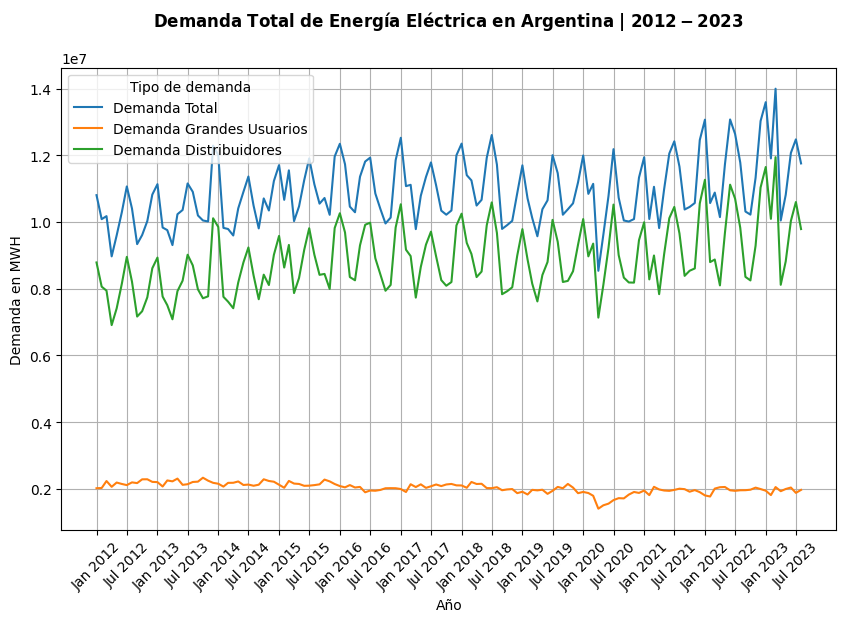

In [79]:
# Crear el gráfico de serie de tiempo
plot.figure(figsize=(10, 6))  # Tamaño de la figura

sns.lineplot(demanda, x="fecha", y="demanda_total", label="Demanda Total")
sns.lineplot(demanda, x="fecha", y="demanda_gu", label="Demanda Grandes Usuarios")
sns.lineplot(demanda, x="fecha", y="demanda_di", label="Demanda Distribuidores")

# Personalizar el gráfico
plot.title(r'$\mathbf{Demanda\ Total\ de\ Energía\ Eléctrica\ en\ Argentina\ | \ 2012-2023}$', pad=30)
plot.xlabel('Fecha')
plot.ylabel('Demanda en mwh')
plot.grid(True)

# Configurar el intervalo de las etiquetas del eje x (por ejemplo, cada año)
plot.xticks(demanda['fecha'][::6], demanda['fecha'].dt.strftime('%b %Y')[::6], rotation=45)

plot.legend(title='Tipo de demanda')
plot.ylabel('Demanda en MWH')
plot.xlabel('Año')


## 2.4 Cantidad de Usuarios GU y DI Mensual

In [80]:
# Agrupar por mes y categoría de demanda, contar la cantidad de usuarios y resetear el índice
agrupado_df = data.groupby(['mes', 'categoria_demanda']).size().reset_index(name='cantidad_usuarios')

# Crear columnas "cantidad_GU" y "cantidad_DI" en el nuevo DataFrame
nuevo_df = pd.DataFrame(columns=['mes', 'cantidad_GU', 'cantidad_DI'])

# Iterar sobre las filas del DataFrame agrupado y llenar el nuevo DataFrame
for index, row in agrupado_df.iterrows():
    mes = row['mes']
    categoria = row['categoria_demanda']
    cantidad_usuarios = row['cantidad_usuarios']
    
    # Comprobar la categoría y llenar las columnas correspondientes en el nuevo DataFrame
    if categoria == 'Gran Usuario':
        nuevo_df = nuevo_df.append({'mes': mes, 'cantidad_GU': cantidad_usuarios, 'cantidad_DI': 0}, ignore_index=True)
    elif categoria == 'Distribuidor':
        nuevo_df = nuevo_df.append({'mes': mes, 'cantidad_GU': 0, 'cantidad_DI': cantidad_usuarios}, ignore_index=True)

# Si hay mess con ambas categorías, combinar las filas correspondientes
nuevo_df = nuevo_df.groupby('mes').sum().reset_index()

# Si es necesario, ordenar el nuevo DataFrame por mes
nuevo_df = nuevo_df.sort_values(by='mes')

# Mostrar el nuevo DataFrame
nuevo_df.columns = ['fecha', 'cantidad_GU', 'cantidad_DI']
nuevo_df['fecha'] = nuevo_df['fecha'].dt.to_period('M')
cantidad_usuarios = nuevo_df

# Convertir la columna 'fecha' de PeriodDtype a Timestamp
cantidad_usuarios['fecha'] = cantidad_usuarios['fecha'].dt.to_timestamp()

cantidad_usuarios


C:\Users\manue\AppData\Local\Temp\ipykernel_11724\3960762094.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nuevo_df = nuevo_df.append({'mes': mes, 'cantidad_GU': 0, 'cantidad_DI': cantidad_usuarios}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11724\3960762094.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nuevo_df = nuevo_df.append({'mes': mes, 'cantidad_GU': cantidad_usuarios, 'cantidad_DI': 0}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11724\3960762094.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nuevo_df = nuevo_df.append({'mes': mes, 'cantidad_GU': 0, 'cantidad_DI': cantidad_usuarios}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11724\39607

,fecha,cantidad_GU,cantidad_DI
0,2012-01-01,464,660
1,2012-02-01,464,670
2,2012-03-01,466,666
3,2012-04-01,466,670
4,2012-05-01,469,668
...,...,...,...
135,2023-04-01,456,732
136,2023-05-01,458,815
137,2023-06-01,458,819
138,2023-07-01,458,819


Text(0.5, 0, 'Fecha')

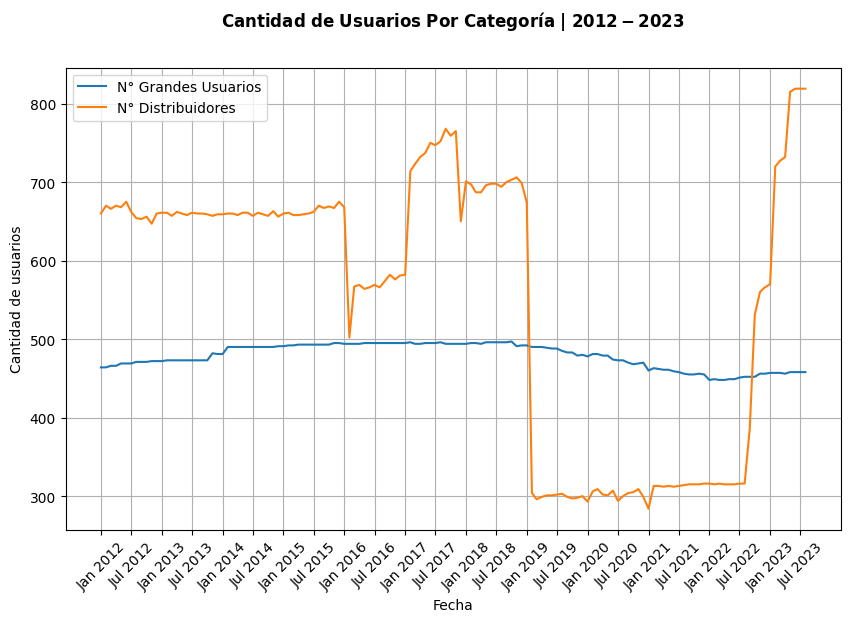

In [94]:
# Crear el gráfico de serie de tiempo
plot.figure(figsize=(10, 6))  # Tamaño de la figura

sns.lineplot(cantidad_usuarios, x="fecha", y="cantidad_GU", label="N° Grandes Usuarios")
sns.lineplot(cantidad_usuarios, x="fecha", y="cantidad_DI", label="N° Distribuidores")

# Personalizar el gráfico
plot.title(r'$\mathbf{Cantidad\ de\ Usuarios\ Por\ Categoría\ | \ 2012-2023}$', pad=30)
plot.xlabel('Fecha')
plot.ylabel('Demanda en mwh')
plot.grid(True)

# Configurar el intervalo de las etiquetas del eje x (por ejemplo, cada año)
plot.xticks(cantidad_usuarios['fecha'][::6], cantidad_usuarios['fecha'].dt.strftime('%b %Y')[::6], rotation=45)

# plot.legend(title='Tipo de demanda')
plot.ylabel('Cantidad de usuarios')
plot.xlabel('Fecha')

## 2.5 EMAE

In [95]:
emae = pd.read_csv(r"./EMAEHISTORICO.csv", delimiter=',')
emae = emae[['indice_tiempo', 'emae_original']]
emae = emae[emae['indice_tiempo'] >= '2012-01-01'].reset_index(drop=True)
emae.columns = ['fecha', 'emae']

emae['fecha'] = pd.to_datetime(emae['fecha'], format='%Y-%m-%d')

emae

,fecha,emae
0,2012-01-01,136.194081
1,2012-02-01,132.360526
2,2012-03-01,147.441016
3,2012-04-01,145.520278
4,2012-05-01,157.404184
...,...,...
135,2023-04-01,149.097660
136,2023-05-01,153.848686
137,2023-06-01,151.849509
138,2023-07-01,149.146868


Text(0.5, 0, 'Fecha')

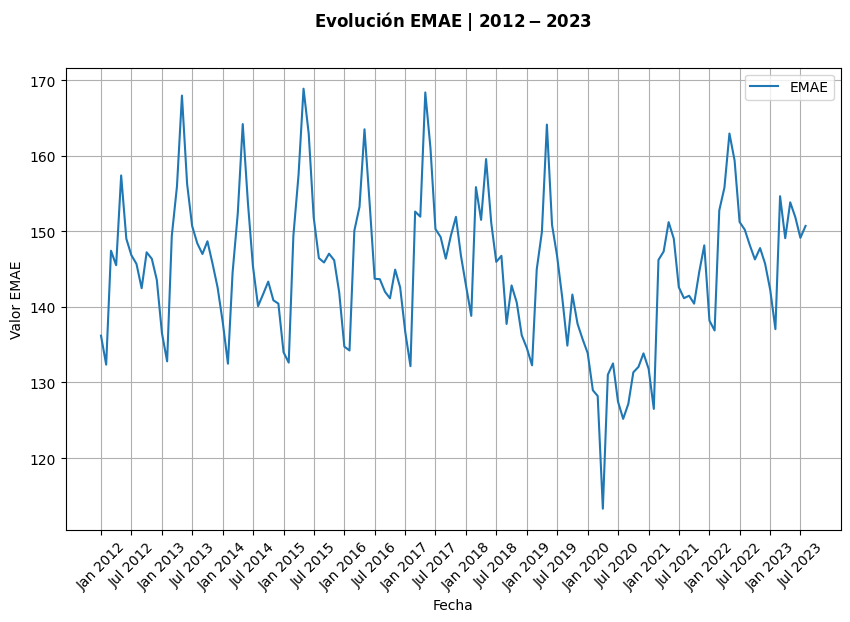

In [97]:
# Crear el gráfico de serie de tiempo
plot.figure(figsize=(10, 6))  # Tamaño de la figura

sns.lineplot(emae, x="fecha", y="emae", label="EMAE")

# Personalizar el gráfico
plot.title(r'$\mathbf{Evolución \ EMAE\ | \ 2012-2023}$', pad=30)
plot.xlabel('Fecha')
plot.ylabel('Demanda en mwh')
plot.grid(True)

# Configurar el intervalo de las etiquetas del eje x (por ejemplo, cada año)
plot.xticks(emae['fecha'][::6], emae['fecha'].dt.strftime('%b %Y')[::6], rotation=45)

# plot.legend(title='Tipo de demanda')
plot.ylabel('Valor EMAE')
plot.xlabel('Fecha')

## 2.6 Temperatura Media Histórica

In [126]:
tempertura = pd.read_excel(r"../analisis_exploratorio/demandaHistoricaSadi.xlsx")
tempertura

# tempertura.columns = ['fecha', 'temperatura']

temperatura = tempertura.iloc[:, [1, 12]]
temperatura.columns = ['fecha', 'temperatura_media_C']
temperatura.temperatura_media_C = pd.to_numeric(temperatura.temperatura_media_C, errors='coerce')
temperatura.fecha = pd.to_datetime(temperatura.fecha, errors='coerce')

temperatura

C:\Users\manue\AppData\Local\Temp\ipykernel_11724\847714022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperatura.temperatura_media_C = pd.to_numeric(temperatura.temperatura_media_C, errors='coerce')
C:\Users\manue\AppData\Local\Temp\ipykernel_11724\847714022.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperatura.fecha = pd.to_datetime(temperatura.fecha, errors='coerce')


,fecha,temperatura_media_C
0,2007-01-01,29.20
1,2007-01-01,26.01
2,2007-01-01,25.00
3,2007-01-01,25.00
4,2007-01-01,22.60
...,...,...
6001,2023-06-01,18.40
6002,2023-06-01,21.80
6003,2023-06-01,18.00
6004,2023-06-01,10.60


In [130]:
# agrupar por mes y calcular la temperatura media de ese mes

temperatura = temperatura.groupby(temperatura['fecha'].dt.to_period('M')).mean().reset_index()
temperatura.columns = ['fecha', 'temperatura_media_C']
temperatura['fecha'] = temperatura['fecha'].dt.to_timestamp()
temperatura

,fecha,temperatura_media_C
0,2012-01-01,26.261290
1,2012-02-01,24.848276
2,2012-03-01,21.696774
3,2012-04-01,18.090000
4,2012-05-01,16.887097
...,...,...
133,2023-02-01,25.821429
134,2023-03-01,27.093548
135,2023-04-01,18.410000
136,2023-05-01,16.409677


In [133]:
temperatura[temperatura.fecha == '2022-07-01']

,fecha,temperatura_media_C
126,2022-07-01,12.464516


In [134]:
temperatura[temperatura.fecha == '2022-08-01']

,fecha,temperatura_media_C
127,2022-08-01,13.748387


In [135]:
# Agregar dos registros faltantes (2023-07-01 y 2023-08-01) con el valor de la temperatura media de 2022-07-01 y 2022-08-01, respectivamente

temperatura = temperatura.append({'fecha': '2023-07-01', 'temperatura_media_C': 12.464516}, ignore_index=True)
temperatura = temperatura.append({'fecha': '2023-08-01', 'temperatura_media_C': 13.748387}, ignore_index=True)

C:\Users\manue\AppData\Local\Temp\ipykernel_11724\3841372174.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temperatura = temperatura.append({'fecha': '2023-07-01', 'temperatura_media_C': 12.464516}, ignore_index=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11724\3841372174.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temperatura = temperatura.append({'fecha': '2023-08-01', 'temperatura_media_C': 13.748387}, ignore_index=True)


In [138]:
temperatura['fecha'] = pd.to_datetime(temperatura['fecha'], format='%Y-%m-%d')
temperatura

,fecha,temperatura_media_C
0,2012-01-01,26.261290
1,2012-02-01,24.848276
2,2012-03-01,21.696774
3,2012-04-01,18.090000
4,2012-05-01,16.887097
...,...,...
135,2023-04-01,18.410000
136,2023-05-01,16.409677
137,2023-06-01,16.309091
138,2023-07-01,12.464516


([<matplotlib.axis.XTick at 0x26db522c0a0>,
 [Text(15340.0, 0, 'Jan 2012'),
  Text(15522.0, 0, 'Jul 2012'),
  Text(15706.0, 0, 'Jan 2013'),
  Text(15887.0, 0, 'Jul 2013'),
  Text(16071.0, 0, 'Jan 2014'),
  Text(16252.0, 0, 'Jul 2014'),
  Text(16436.0, 0, 'Jan 2015'),
  Text(16617.0, 0, 'Jul 2015'),
  Text(16801.0, 0, 'Jan 2016'),
  Text(16983.0, 0, 'Jul 2016'),
  Text(17167.0, 0, 'Jan 2017'),
  Text(17348.0, 0, 'Jul 2017'),
  Text(17532.0, 0, 'Jan 2018'),
  Text(17713.0, 0, 'Jul 2018'),
  Text(17897.0, 0, 'Jan 2019'),
  Text(18078.0, 0, 'Jul 2019'),
  Text(18262.0, 0, 'Jan 2020'),
  Text(18444.0, 0, 'Jul 2020'),
  Text(18628.0, 0, 'Jan 2021'),
  Text(18809.0, 0, 'Jul 2021'),
  Text(18993.0, 0, 'Jan 2022'),
  Text(19174.0, 0, 'Jul 2022'),
  Text(19358.0, 0, 'Jan 2023'),
  Text(19539.0, 0, 'Jul 2023')])

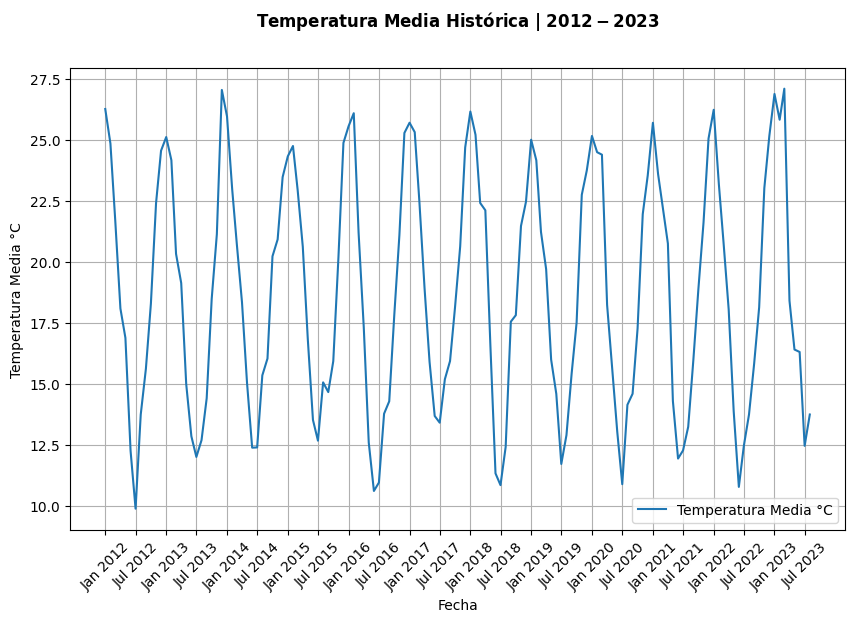

In [139]:
# Crear el gráfico de serie de tiempo
plot.figure(figsize=(10, 6))  # Tamaño de la figura

sns.lineplot(temperatura, x="fecha", y="temperatura_media_C", label="Temperatura Media °C")

# Personalizar el gráfico
plot.title(r'$\mathbf{Temperatura \ Media \ Histórica\ | \ 2012-2023}$', pad=30)
plot.xlabel('Fecha')
plot.ylabel('Temperatura Media °C')
plot.grid(True)

# Configurar el intervalo de las etiquetas del eje x (por ejemplo, cada año)
plot.xticks(emae['fecha'][::6], emae['fecha'].dt.strftime('%b %Y')[::6], rotation=45)


## 2.7 Valor promedio mensual del Dólar Oficial

In [268]:
# Cargar el DataFrame desde el archivo Excel
dolar = pd.read_excel(r"./CotizacionesBCRA.xlsx")

# Asegúrate de que la columna 'fecha' sea del tipo datetime
dolar['fecha'] = pd.to_datetime(dolar['fecha'])

# Eliminar duplicados basados en la columna 'fecha'
dolar = dolar.drop_duplicates(subset=['fecha'])

# Establecer las fechas como índice
dolar.set_index('fecha', inplace=True)

# Crear un rango de fechas desde el 1/1/2007 hasta el 11/06/2023
rango_fechas = pd.date_range(start='2007-01-01', end='2023-10-30', freq='D')

# Reindexar el DataFrame con el rango de fechas completo
dolar_reindexado = dolar.reindex(rango_fechas)

# Rellenar los valores faltantes utilizando el método forward fill (ffill)
dolar_reindexado['valor'] = dolar_reindexado['valor'].ffill()

# Si deseas guardar el resultado en un nuevo archivo CSV
# dolar_reindexado.to_csv('datos_actualizados.csv')

# Verificar el DataFrame actualizado
dolar_reindexado = dolar_reindexado.reset_index()
dolar_reindexado.info()
dolar_reindexado.columns = ['fecha', 'dolar_oficial']
dolar_reindexado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6147 entries, 0 to 6146
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   6147 non-null   datetime64[ns]
 1   valor   6147 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 96.2 KB


,fecha,dolar_oficial
0,2007-01-01,3.058
1,2007-01-02,3.058
2,2007-01-03,3.059
3,2007-01-04,3.072
4,2007-01-05,3.078
...,...,...
6142,2023-10-26,349.950
6143,2023-10-27,349.950
6144,2023-10-28,349.950
6145,2023-10-29,349.950


In [269]:
dolar_reindexado = dolar_reindexado.groupby(dolar_reindexado['fecha'].dt.to_period('M')).mean().reset_index()
dolar_reindexado = dolar_reindexado[dolar_reindexado['fecha'] >= '2012-01-01']
dolar_reindexado = dolar_reindexado[dolar_reindexado['fecha'] < '2023-09-01']
dolar_reindexado['fecha'] = dolar_reindexado['fecha'].dt.to_timestamp()
dolar = dolar_reindexado
dolar.reset_index(drop=True, inplace=True)
dolar

,fecha,dolar_oficial
0,2012-01-01,4.320161
1,2012-02-01,4.347241
2,2012-03-01,4.356097
3,2012-04-01,4.398100
4,2012-05-01,4.450226
...,...,...
135,2023-04-01,215.790333
136,2023-05-01,231.168710
137,2023-06-01,248.363333
138,2023-07-01,266.024194


([<matplotlib.axis.XTick at 0x26dbb184d00>,
 [Text(15340.0, 0, 'Jan 2012'),
  Text(15522.0, 0, 'Jul 2012'),
  Text(15706.0, 0, 'Jan 2013'),
  Text(15887.0, 0, 'Jul 2013'),
  Text(16071.0, 0, 'Jan 2014'),
  Text(16252.0, 0, 'Jul 2014'),
  Text(16436.0, 0, 'Jan 2015'),
  Text(16617.0, 0, 'Jul 2015'),
  Text(16801.0, 0, 'Jan 2016'),
  Text(16983.0, 0, 'Jul 2016'),
  Text(17167.0, 0, 'Jan 2017'),
  Text(17348.0, 0, 'Jul 2017'),
  Text(17532.0, 0, 'Jan 2018'),
  Text(17713.0, 0, 'Jul 2018'),
  Text(17897.0, 0, 'Jan 2019'),
  Text(18078.0, 0, 'Jul 2019'),
  Text(18262.0, 0, 'Jan 2020'),
  Text(18444.0, 0, 'Jul 2020'),
  Text(18628.0, 0, 'Jan 2021'),
  Text(18809.0, 0, 'Jul 2021'),
  Text(18993.0, 0, 'Jan 2022'),
  Text(19174.0, 0, 'Jul 2022'),
  Text(19358.0, 0, 'Jan 2023'),
  Text(19539.0, 0, 'Jul 2023')])

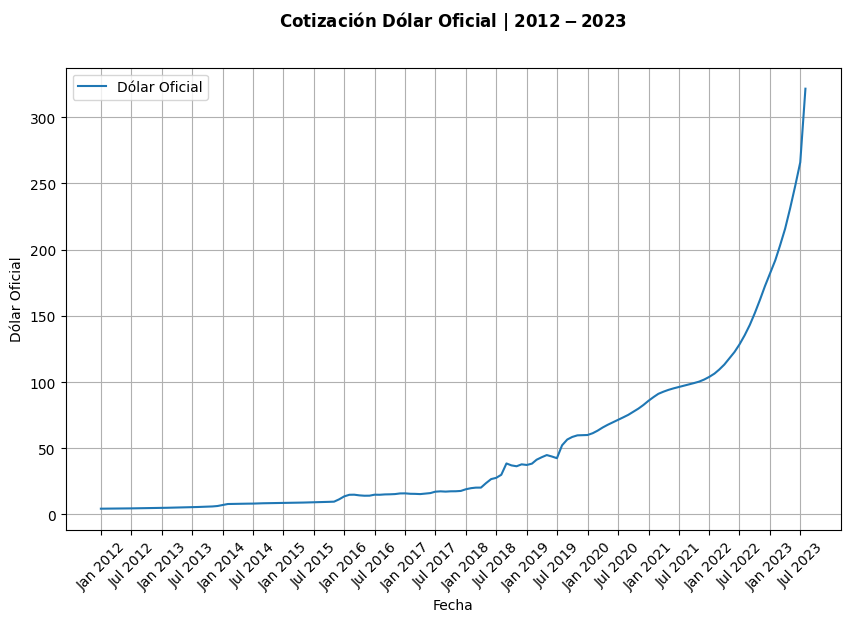

In [272]:
# Crear el gráfico de serie de tiempo
plot.figure(figsize=(10, 6))  # Tamaño de la figura

sns.lineplot(dolar, x="fecha", y="dolar_oficial", label="Dólar Oficial")

# Personalizar el gráfico
plot.title(r'$\mathbf{Cotización \ Dólar \ Oficial\ | \ 2012-2023}$', pad=30)
plot.xlabel('Fecha')
plot.ylabel('Dólar Oficial')
plot.grid(True)

# Configurar el intervalo de las etiquetas del eje x (por ejemplo, cada año)
plot.xticks(dolar['fecha'][::6], dolar['fecha'].dt.strftime('%b %Y')[::6], rotation=45)

## 2.8 Generación de Dataframe con features y target

In [153]:
mergedData = pd.merge(demanda, cantidad_usuarios, on='fecha')
mergedData = pd.merge(mergedData, emae, on='fecha')
mergedData = pd.merge(mergedData, temperatura, on='fecha')
mergedData = pd.merge(mergedData, dolar, on='fecha')
#Creo las columnas con el mes, el trimestre y el año
mergedData['mes'] = mergedData.fecha.dt.month
mergedData['año'] = mergedData.fecha.dt.year
mergedData['trimestre'] = mergedData.fecha.dt.quarter
mergedData

,fecha,demanda_total,demanda_gu,demanda_di,cantidad_GU,cantidad_DI,emae,temperatura_media_C,dolar_oficial,mes,año,trimestre
0,2012-01-01,1.080470e+07,2017838.237,8.786862e+06,464,660,136.194081,26.261290,4.320161,1,2012,1
1,2012-02-01,1.008555e+07,2023988.130,8.061564e+06,464,670,132.360526,24.848276,4.347241,2,2012,1
2,2012-03-01,1.017537e+07,2233692.414,7.941673e+06,466,666,147.441016,21.696774,4.356097,3,2012,1
3,2012-04-01,8.969068e+06,2060515.240,6.908553e+06,466,670,145.520278,18.090000,4.398100,4,2012,2
4,2012-05-01,9.597272e+06,2188343.073,7.408929e+06,469,668,157.404184,16.887097,4.450226,5,2012,2
...,...,...,...,...,...,...,...,...,...,...,...,...
135,2023-04-01,1.004620e+07,1928987.014,8.117214e+06,456,732,149.097660,18.410000,215.790333,4,2023,2
136,2023-05-01,1.081549e+07,1994906.112,8.820579e+06,458,815,153.848686,16.409677,231.168710,5,2023,2
137,2023-06-01,1.207183e+07,2038714.276,1.003312e+07,458,819,151.849509,16.309091,248.363333,6,2023,2
138,2023-07-01,1.247727e+07,1878710.363,1.059856e+07,458,819,149.146868,12.464516,266.024194,7,2023,3


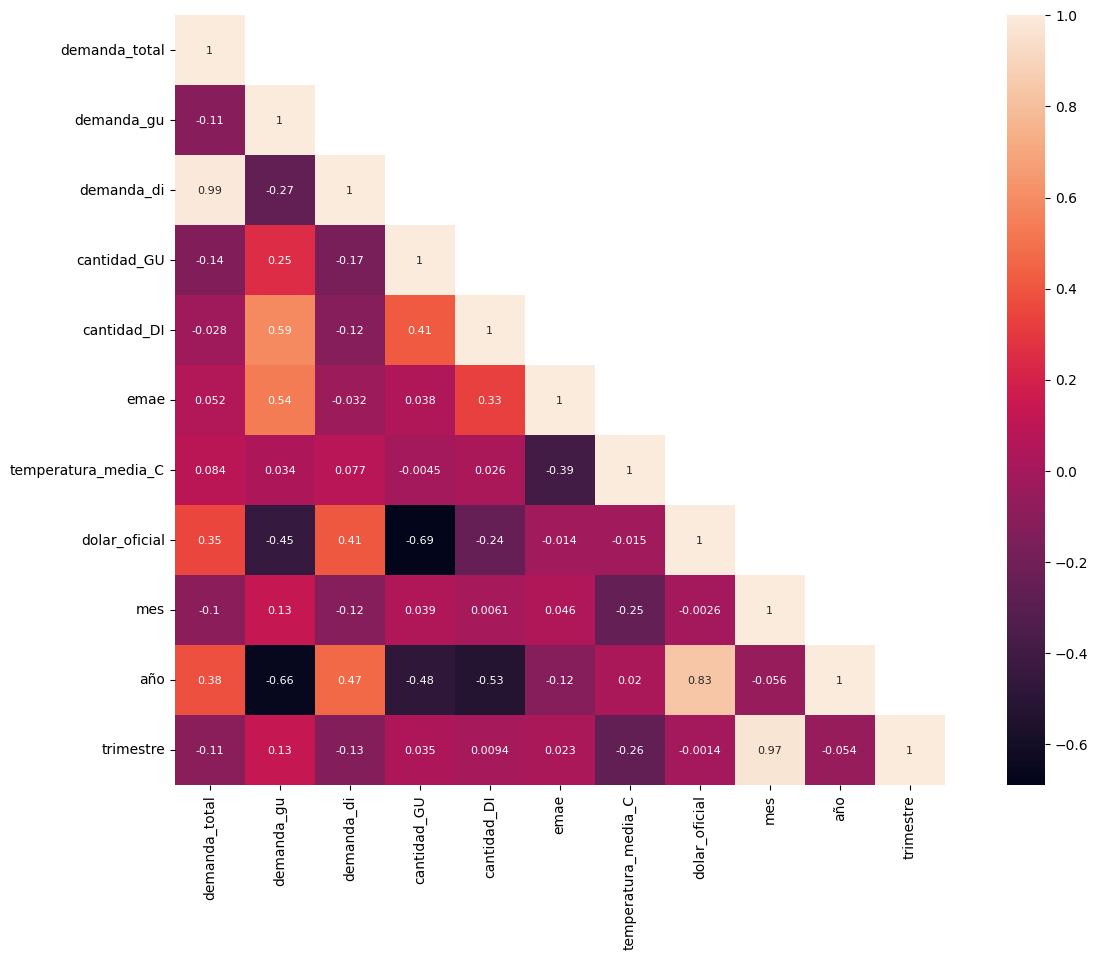

In [154]:
#Analizamos las correlaciones

#Hago una matriz de correlacion

cor_mat= mergedData.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plot.gcf()
fig.set_size_inches(16,10)
g = sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True, annot_kws = {'fontsize':8})



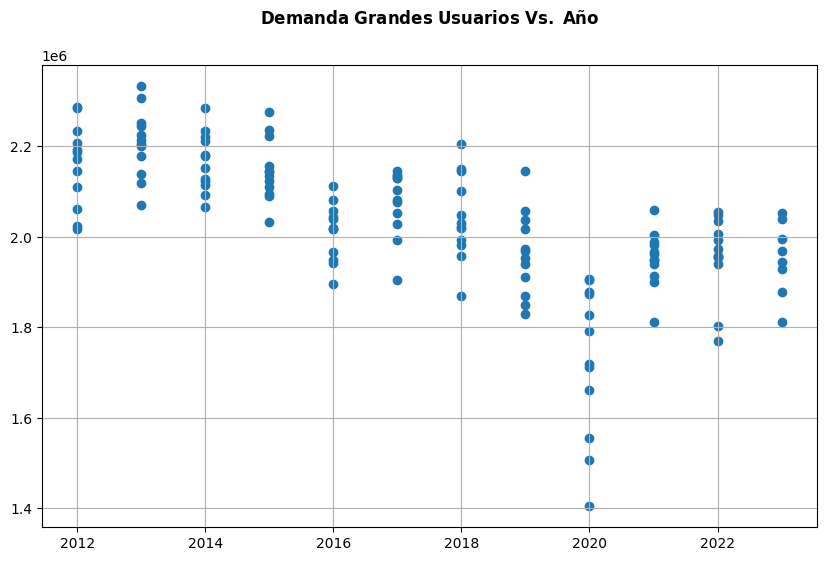

In [165]:
# Viendo ls corr matrix, vemos correlacion negativa entre la demanda GU y año. Es decir que a medida que aumentan los años la demanda GU disminuye. Eso puede observarse en el siguiente grafico.
plot.figure(figsize=(10,6))
plot.scatter(mergedData.año, mergedData.demanda_gu)
# Personalizar el gráfico
plot.title(r'$\mathbf{Demanda \ Grandes \ Usuarios \ Vs. \ Año}$', pad=30)
plot.grid(True)
plot.show()

# 3. Predicción de las features a futuro con Prophet

##### Con el dataset mergedData ya pudemos realizar el modelo con pyCaret y entrenarlo, sin embargo, para lograr predecir en un horizonte de tres años se necesita brindarle como input los valores futuros de las features con las que fue entrenado el modelo, es decir debemos realizar un pronóstico para cada feature.

##### Las features son todas series de tiempo por lo tanto una de las mejores herramientas es Facebook Prophet que se distingue por su precisión para predecir series de tiempo univariadas.

In [198]:
from prophet import Prophet

## 3.1 Forecast con Prophet para la Demanda GU

In [249]:
# demanda_gu.columns = ['ds', 'y']
# demanda_gu.ds = demanda_gu.ds.dt.to_timestamp()
modelo_demandaGU = Prophet(seasonality_mode='multiplicative', daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True)
modelo_demandaGU.fit(demanda_gu)

22:51:25 - cmdstanpy - INFO - Chain [1] start processing
22:51:25 - cmdstanpy - INFO - Chain [1] done processing


In [250]:
# Crear el rango de fechas con frecuencia mensual
horizonte_preditivo = pd.date_range(start='2023-09', end='2026-09', freq='M')
# Convertir las fechas a periodos mensuales y luego nuevamente a objetos de fecha con el primer día del mes
horizonte_preditivo = horizonte_preditivo.to_period('M').to_timestamp()
# Crear un DataFrame con la columna 'ds' que contiene las fechas ajustadas al primer día de cada mes
horizonte_preditivo = pd.DataFrame({'ds': horizonte_preditivo})
# Imprimir el DataFrame
horizonte_preditivo
# fechas que tenemos
mergedData.fecha = mergedData.fecha.dt.to_period('M').dt.to_timestamp()
mergedData_dates = mergedData.fecha.to_frame()
mergedData_dates.columns = ['ds']
mergedData_dates
#concatenar los dataframes
future = pd.concat([mergedData_dates, horizonte_preditivo], axis=0).reset_index(drop=True)
future

,ds
0,2012-01-01
1,2012-02-01
2,2012-03-01
3,2012-04-01
4,2012-05-01
...,...
171,2026-04-01
172,2026-05-01
173,2026-06-01
174,2026-07-01


In [251]:
forecast = modelo_demandaGU.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_demandaGU = forecast[forecast['ds'] >= '2023-09-01']
future_demandaGU = future_demandaGU[['ds', 'yhat']]
future_demandaGU.columns = ['fecha', 'demanda_gu']
# future_demandaGU = future_demandaGU.reset_index(drop=True, inplace=True)
# future_demandaGU
future_demandaGU.reset_index(drop=True, inplace=True)
future_demandaGU

,fecha,demanda_gu
0,2023-09-01,1.971284e+06
1,2023-10-01,2.084874e+06
2,2023-11-01,2.067591e+06
3,2023-12-01,1.991204e+06
4,2024-01-01,1.933013e+06
5,2024-02-01,1.879603e+06
6,2024-03-01,2.052508e+06
7,2024-04-01,1.943594e+06
8,2024-05-01,2.023635e+06
9,2024-06-01,1.954035e+06


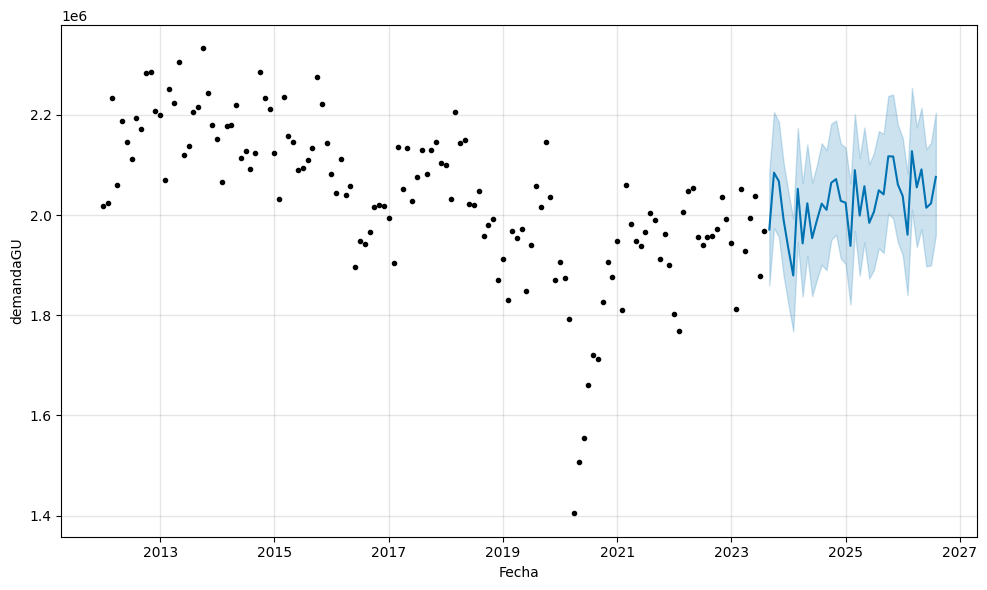

In [252]:
fig1 = modelo_demandaGU.plot(forecast[forecast['ds'] > '2023-08-01'], xlabel='Fecha', ylabel='demandaGU')

## 3.2 Forecast con Prophet para la Demanda DI

In [245]:
# demanda_di.columns = ['ds', 'y']
# demanda_di.ds = demanda_di.ds.dt.to_timestamp()
modelo_demandaDI = Prophet(seasonality_mode='multiplicative', mcmc_samples=300)
modelo_demandaDI.fit(demanda_di)

22:49:15 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

22:49:18 - cmdstanpy - INFO - CmdStan done processing.
22:49:18 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


In [246]:
forecast = modelo_demandaDI.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_demandaDI = forecast[forecast['ds'] >= '2023-09-01']
future_demandaDI = future_demandaDI[['ds', 'yhat']]
future_demandaDI.columns = ['fecha', 'demanda_di']
future_demandaDI.reset_index(drop=True, inplace=True)
future_demandaDI

,fecha,demanda_di
0,2023-09-01,9.119698e+06
1,2023-10-01,9.270291e+06
2,2023-11-01,9.287445e+06
3,2023-12-01,1.073235e+07
4,2024-01-01,1.137850e+07
5,2024-02-01,1.026920e+07
6,2024-03-01,9.945260e+06
7,2024-04-01,8.904857e+06
8,2024-05-01,9.963776e+06
9,2024-06-01,1.090232e+07


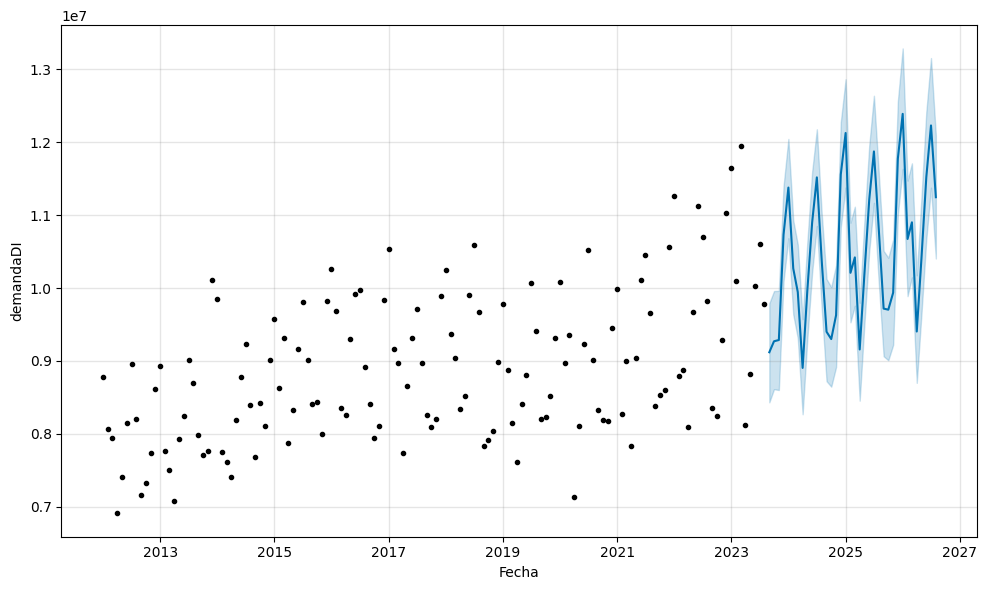

In [247]:
fig1 = modelo_demandaDI.plot(forecast[forecast['ds'] > '2023-08-01'], xlabel='Fecha', ylabel='demandaDI')

## 3.3 Forecast con Prophet para Cantidad de Grandes Usuarios

In [242]:
cantidad_usuarios_gu = cantidad_usuarios[['fecha', 'cantidad_GU']]
cantidad_usuarios_gu.columns = ['ds', 'y']
# temperatura.ds = temperatura.ds.dt.to_timestamp()
modelo_cantidad_usuariosGU = Prophet(seasonality_mode='multiplicative', mcmc_samples=300)
modelo_cantidad_usuariosGU.fit(cantidad_usuarios_gu)

22:48:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

22:48:48 - cmdstanpy - INFO - CmdStan done processing.
22:48:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!
22:48:48 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 146 iterations at max treedepth (97.3%)
	Chain 2 had 145 iterations at max treedepth (96.7%)
	Chain 3 had 142 iterations at max treedepth (94.7%)
	Chai

In [243]:
forecast = modelo_cantidad_usuariosGU.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_cantidad_usuarios_gu = forecast[forecast['ds'] >= '2023-09-01']
future_cantidad_usuarios_gu = future_cantidad_usuarios_gu[['ds', 'yhat']]
future_cantidad_usuarios_gu.columns = ['fecha', 'cantidad_usuarios_gu']
future_cantidad_usuarios_gu.reset_index(drop=True, inplace=True)
future_cantidad_usuarios_gu

,fecha,cantidad_usuarios_gu
0,2023-09-01,452.209837
1,2023-10-01,452.832475
2,2023-11-01,452.304571
3,2023-12-01,452.896460
4,2024-01-01,452.600965
5,2024-02-01,452.888067
6,2024-03-01,452.893179
7,2024-04-01,452.594790
8,2024-05-01,453.620673
9,2024-06-01,452.250233


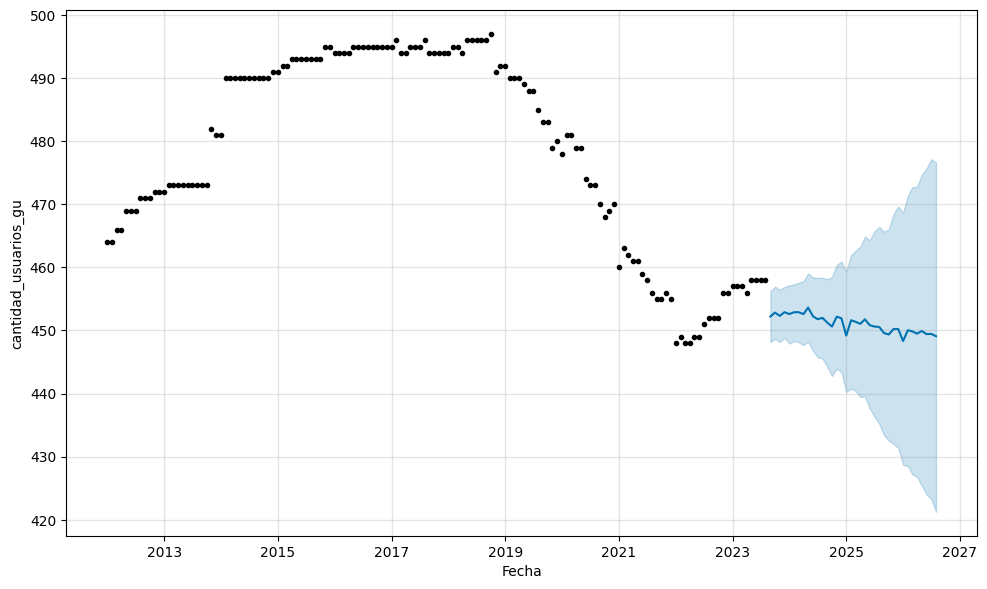

In [244]:
fig1 = modelo_cantidad_usuariosGU.plot(forecast[forecast['ds'] > '2023-08-01'], xlabel='Fecha', ylabel='cantidad_usuarios_gu')

## 3.4 Forecast con Prophet para Cantidad de Usuarios DI

In [239]:
cantidad_usuarios_di = cantidad_usuarios[['fecha', 'cantidad_DI']]
cantidad_usuarios_di.columns = ['ds', 'y']
# temperatura.ds = temperatura.ds.dt.to_timestamp()
modelo_cantidad_usuariosDI = Prophet(seasonality_mode='multiplicative', mcmc_samples=300, changepoint_prior_scale=0.05, changepoint_range=0.9)
modelo_cantidad_usuariosDI.fit(cantidad_usuarios_di)

22:48:02 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

22:48:06 - cmdstanpy - INFO - CmdStan done processing.
22:48:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


In [240]:
forecast = modelo_cantidad_usuariosDI.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_cantidad_usuarios_di = forecast[forecast['ds'] >= '2023-09-01']
future_cantidad_usuarios_di = future_cantidad_usuarios_di[['ds', 'yhat']]
future_cantidad_usuarios_di.columns = ['fecha', 'cantidad_usuarios_di']
future_cantidad_usuarios_di.reset_index(drop=True, inplace=True)
future_cantidad_usuarios_di

,fecha,cantidad_usuarios_di
0,2023-09-01,403.442964
1,2023-10-01,476.132275
2,2023-11-01,475.479651
3,2023-12-01,499.978383
4,2024-01-01,462.002656
5,2024-02-01,373.408453
6,2024-03-01,416.117917
7,2024-04-01,456.405803
8,2024-05-01,455.365800
9,2024-06-01,486.801403


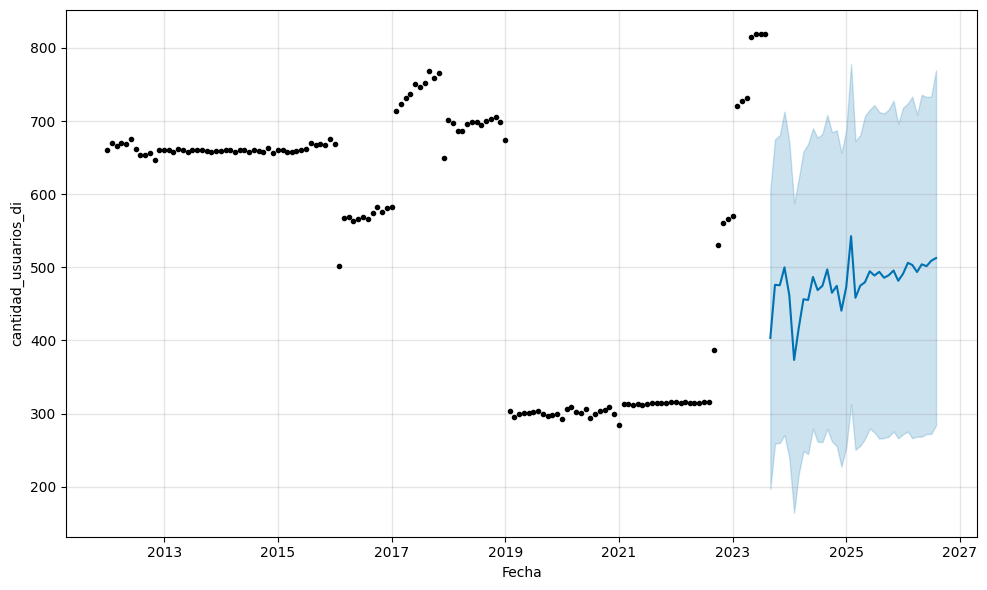

In [241]:
fig1 = modelo_cantidad_usuariosDI.plot(forecast[forecast['ds'] > '2023-08-01'], xlabel='Fecha', ylabel='cantidad_usuarios_di')

## 3.5 Forecast con Prophet para Temperatura Media

In [233]:
temperatura.columns = ['ds', 'y']
# temperatura.ds = temperatura.ds.dt.to_timestamp()
modelo_temperatura = Prophet(seasonality_mode='multiplicative', mcmc_samples=300)
modelo_temperatura.fit(temperatura)

22:46:05 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

22:46:08 - cmdstanpy - INFO - CmdStan done processing.
22:46:08 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


In [234]:
forecast = modelo_temperatura.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_temperatura = forecast[forecast['ds'] >= '2023-09-01']
future_temperatura = future_temperatura[['ds', 'yhat']]
future_temperatura.columns = ['fecha', 'temperatura_media_C']
future_temperatura.reset_index(drop=True, inplace=True)
future_temperatura

,fecha,temperatura_media_C
0,2023-09-01,16.375503
1,2023-10-01,18.603672
2,2023-11-01,22.701992
3,2023-12-01,25.467587
4,2024-01-01,26.891795
5,2024-02-01,26.014264
6,2024-03-01,23.481226
7,2024-04-01,20.125067
8,2024-05-01,16.392082
9,2024-06-01,13.090058


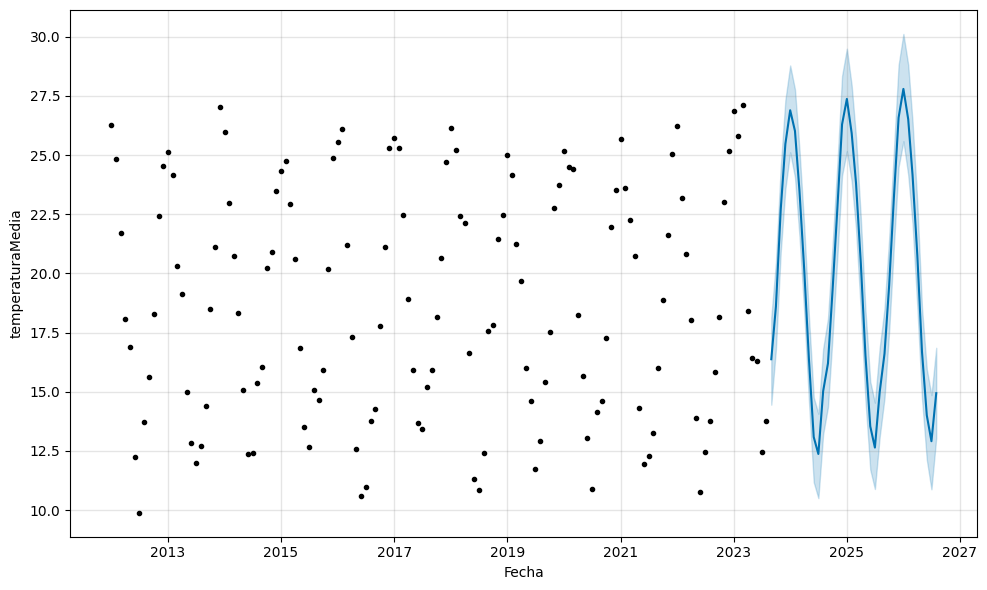

In [235]:
fig1 = modelo_temperatura.plot(forecast[forecast['ds'] > '2023-08-01'], xlabel='Fecha', ylabel='temperaturaMedia')

## 3.6 Forecast con Prophet para EMAE

In [230]:
emae.columns = ['ds', 'y']
# temperatura.ds = temperatura.ds.dt.to_timestamp()
modelo_emae = Prophet(seasonality_mode='multiplicative')
modelo_emae.fit(emae)

22:45:25 - cmdstanpy - INFO - Chain [1] start processing
22:45:25 - cmdstanpy - INFO - Chain [1] done processing


In [231]:
forecast = modelo_emae.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_emae = forecast[forecast['ds'] >= '2023-09-01']
future_emae = future_emae[['ds', 'yhat']]
future_emae.columns = ['fecha', 'emae']
future_emae.reset_index(drop=True, inplace=True)
future_emae

,fecha,emae
0,2023-09-01,148.412804
1,2023-10-01,153.088690
2,2023-11-01,152.298041
3,2023-12-01,149.813142
4,2024-01-01,144.647208
5,2024-02-01,140.858211
6,2024-03-01,158.230811
7,2024-04-01,157.222102
8,2024-05-01,171.735812
9,2024-06-01,165.420599


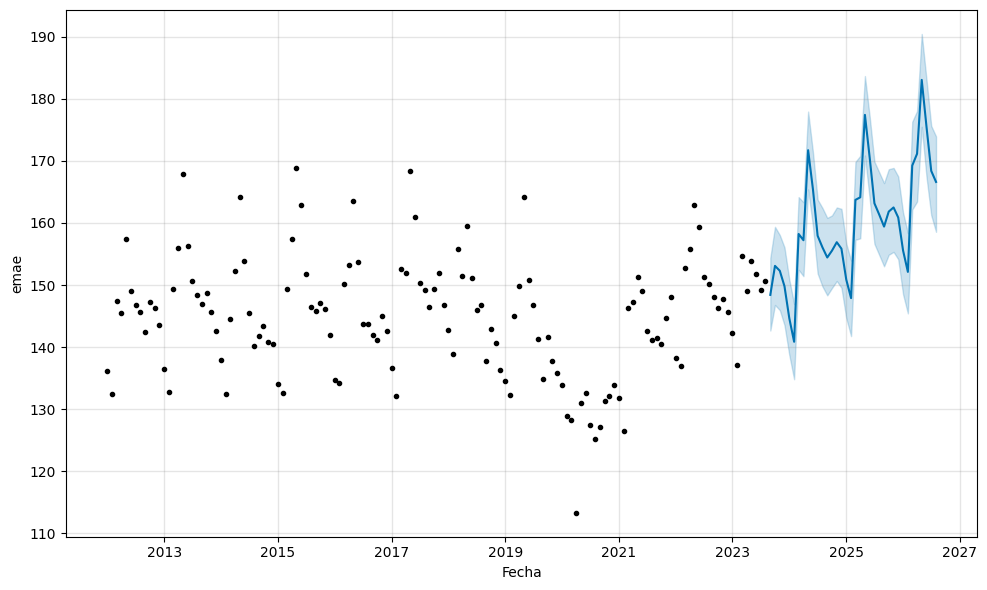

In [232]:
fig1 = modelo_emae.plot(forecast[forecast['ds'] > '2023-08-01'], xlabel='Fecha', ylabel='emae')

## 3.6 Forecast Dólar Oficial

#### Para predecir el valor del dólar oficial no utilizaremos Prophet ya que es un valor muy volátil y no posee estacionalidad, por ende definimos que lo mejor es basarnos en el forecast realizado por la consultora GOV Capital, que se dedica realizar pronósticos de valores para distintos activos monetarios. 

#### En este caso el pronóstico de la consultora es en base diaria, por ende para llevarlo a nuestra base mensual realizamos una manipulación del mismo para llegar a un valor promedio del mes.

In [264]:
future_dolar = pd.read_excel(r"./dolar_GOV_Capital.xlsx")
future_dolar.drop('Unnamed: 0', axis=1, inplace=True)
future_dolar.columns = ['fecha', 'dolar_oficial']
future_dolar = future_dolar[future_dolar['fecha'] >= '2023-09-01']

In [265]:
future_dolar = future_dolar.groupby(future_dolar['fecha'].dt.to_period('M')).mean().reset_index()
future_dolar = future_dolar[future_dolar['fecha'] >= '2023-09-01']
future_dolar = future_dolar[future_dolar['fecha'] <= '2026-08-01']
future_dolar['fecha'] = future_dolar['fecha'].dt.to_timestamp()
future_dolar.reset_index(drop=True, inplace=True)
future_dolar

,fecha,dolar_oficial
0,2023-09-01,350.008333
1,2023-10-01,350.005000
2,2023-11-01,352.641000
3,2023-12-01,359.265710
4,2024-01-01,366.149194
5,2024-02-01,372.941207
6,2024-03-01,379.903968
7,2024-04-01,387.783267
8,2024-05-01,396.681323
9,2024-06-01,406.263000


AttributeError: 'DatetimeIndex' object has no attribute 'dt'

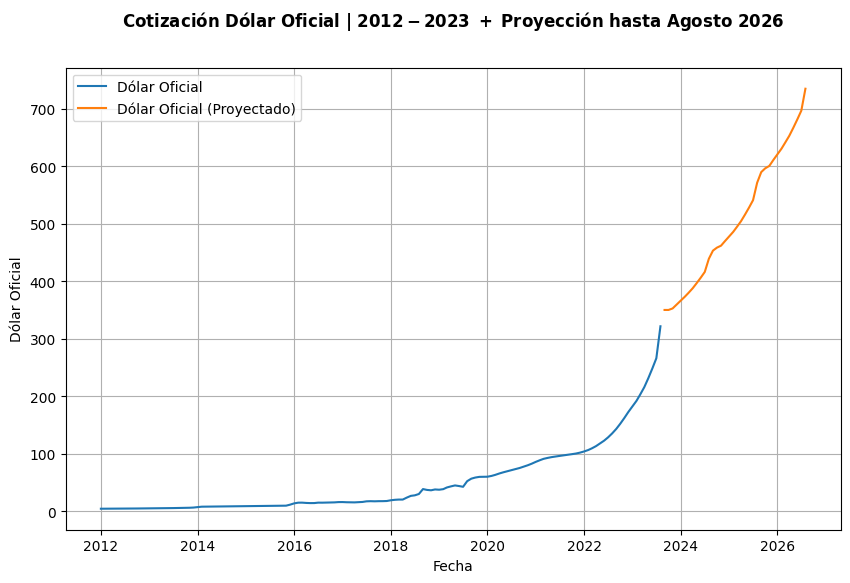

In [277]:
# Crear el gráfico de serie de tiempo
plot.figure(figsize=(10, 6))  # Tamaño de la figura

sns.lineplot(dolar, x="fecha", y="dolar_oficial", label="Dólar Oficial")
sns.lineplot(future_dolar, x="fecha", y="dolar_oficial", label="Dólar Oficial (Proyectado)")

# Personalizar el gráfico
plot.title(r'$\mathbf{Cotización \ Dólar \ Oficial\ | \ 2012-2023 \ + \ Proyección \ hasta \ Agosto \ 2026}$', pad=30)
plot.xlabel('Fecha')
plot.ylabel('Dólar Oficial')
plot.grid(True)

rango = pd.date_range(start='2012-01', end='2026-08', freq='M')

# Configurar el intervalo de las etiquetas del eje x (por ejemplo, cada año)
plot.xticks(rango[::6], rango.dt.strftime('%b %Y')[::6], rotation=45)

## 3.7 Generación de Dataframe con features proyectadas

#### El dataframe que se generará ahora se utilizará como input para bridarselo al modelo predictivo generado y entrenado previamente en PyCaret. Este dataframe cuenta con los valores proyectados de todas las variables predictoras hasta Agosto 2026

In [282]:
mergedProjectedData = pd.merge(future_demandaGU, future_demandaDI, on='fecha')
mergedProjectedData = pd.merge(mergedProjectedData, future_cantidad_usuarios_gu, on='fecha')
mergedProjectedData = pd.merge(mergedProjectedData, future_cantidad_usuarios_di, on='fecha')
mergedProjectedData = pd.merge(mergedProjectedData, future_temperatura, on='fecha')
mergedProjectedData = pd.merge(mergedProjectedData, future_emae, on='fecha')
mergedProjectedData = pd.merge(mergedProjectedData, future_dolar, on='fecha')

#Creo las columnas con el mes, el trimestre y el año
mergedProjectedData['mes'] = mergedProjectedData.fecha.dt.month
mergedProjectedData['año'] = mergedProjectedData.fecha.dt.year
mergedProjectedData['trimestre'] = mergedProjectedData.fecha.dt.quarter
mergedProjectedData

,fecha,demanda_gu,demanda_di,cantidad_usuarios_gu,cantidad_usuarios_di,temperatura_media_C,emae,dolar_oficial,mes,año,trimestre
0,2023-09-01,1.971284e+06,9.119698e+06,452.209837,403.442964,16.375503,148.412804,350.008333,9,2023,3
1,2023-10-01,2.084874e+06,9.270291e+06,452.832475,476.132275,18.603672,153.088690,350.005000,10,2023,4
2,2023-11-01,2.067591e+06,9.287445e+06,452.304571,475.479651,22.701992,152.298041,352.641000,11,2023,4
3,2023-12-01,1.991204e+06,1.073235e+07,452.896460,499.978383,25.467587,149.813142,359.265710,12,2023,4
4,2024-01-01,1.933013e+06,1.137850e+07,452.600965,462.002656,26.891795,144.647208,366.149194,1,2024,1
5,2024-02-01,1.879603e+06,1.026920e+07,452.888067,373.408453,26.014264,140.858211,372.941207,2,2024,1
6,2024-03-01,2.052508e+06,9.945260e+06,452.893179,416.117917,23.481226,158.230811,379.903968,3,2024,1
7,2024-04-01,1.943594e+06,8.904857e+06,452.594790,456.405803,20.125067,157.222102,387.783267,4,2024,2
8,2024-05-01,2.023635e+06,9.963776e+06,453.620673,455.365800,16.392082,171.735812,396.681323,5,2024,2
9,2024-06-01,1.954035e+06,1.090232e+07,452.250233,486.801403,13.090058,165.420599,406.263000,6,2024,2


# 4. Generación del Modelo Predictivo con PyCaret

##### Módulo de Regresión de PyCaret:

##### El módulo de regresión de PyCaret es un módulo de aprendizaje automático supervisado utilizado para estimar las relaciones entre una variable dependiente (a menudo llamada 'variable de resultado' o 'objetivo') y una o más variables independientes (a menudo llamadas 'características' o 'predictores').

##### El objetivo de la regresión es predecir valores continuos como cantidad de ventas, cantidad, número de clientes, etc. Todos los módulos en PyCaret proporcionan muchas funciones de preprocesamiento para preparar los datos para el modelado a través de la función de configuración (setup). Tiene más de 25 algoritmos listos para usar y varios gráficos para analizar el rendimiento de los modelos entrenados.

##### Series Temporales con el Módulo de Regresión de PyCaret:

##### La configuración predeterminada del módulo de regresión de PyCaret no es ideal para datos de series temporales porque implica algunos pasos preparatorios de datos que no son válidos para datos ordenados (datos con una secuencia, como datos de series temporales).

##### Por ejemplo, la división del conjunto de datos en conjuntos de entrenamiento y prueba se hace de forma aleatoria con mezcla. Esto no tendría sentido para datos de series temporales, ya que no queremos que las fechas recientes estén incluidas en el conjunto de entrenamiento, mientras que las fechas históricas forman parte del conjunto de prueba.

##### Los datos de series temporales también requieren un tipo diferente de validación cruzada, ya que necesita respetar el orden de las fechas. Por defecto, el módulo de regresión de PyCaret utiliza la validación cruzada aleatoria de k-fold al evaluar modelos. La configuración predeterminada de validación cruzada no es adecuada para datos de series temporales. Por lo tanto, cambiaremos la configuración predeterminada en el Módulo de Regresión de PyCaret para que funcione con datos de series temporales.

In [283]:
#Repasando un poco, el siguiente es el dataframe con el que alimentamos el modelo predictivo.

mergedData

,fecha,demanda_total,demanda_gu,demanda_di,cantidad_GU,cantidad_DI,emae,temperatura_media_C,dolar_oficial,mes,año,trimestre
0,2012-01-01,1.080470e+07,2017838.237,8.786862e+06,464,660,136.194081,26.261290,4.320161,1,2012,1
1,2012-02-01,1.008555e+07,2023988.130,8.061564e+06,464,670,132.360526,24.848276,4.347241,2,2012,1
2,2012-03-01,1.017537e+07,2233692.414,7.941673e+06,466,666,147.441016,21.696774,4.356097,3,2012,1
3,2012-04-01,8.969068e+06,2060515.240,6.908553e+06,466,670,145.520278,18.090000,4.398100,4,2012,2
4,2012-05-01,9.597272e+06,2188343.073,7.408929e+06,469,668,157.404184,16.887097,4.450226,5,2012,2
...,...,...,...,...,...,...,...,...,...,...,...,...
135,2023-04-01,1.004620e+07,1928987.014,8.117214e+06,456,732,149.097660,18.410000,215.790333,4,2023,2
136,2023-05-01,1.081549e+07,1994906.112,8.820579e+06,458,815,153.848686,16.409677,231.168710,5,2023,2
137,2023-06-01,1.207183e+07,2038714.276,1.003312e+07,458,819,151.849509,16.309091,248.363333,6,2023,2
138,2023-07-01,1.247727e+07,1878710.363,1.059856e+07,458,819,149.146868,12.464516,266.024194,7,2023,3


## 4.1 Separación TRAIN-TEST

#### Entrenamos al modelo con el conjunto TRAIN, y se testea que tan bien predice el conjunto TEST. A partir de eso se generan distintas métricas para evaluar la calidad del modelo predictivo.

#### Lo vamos a entrenar con los datos desde Enero 2012 hasta Agosto 2022, y nos guardamos el último año de información histórica para realizar el testeo.

In [290]:
train = mergedData[:-12] 
test = mergedData[-12:] 

In [291]:
train

,fecha,demanda_total,demanda_gu,demanda_di,cantidad_GU,cantidad_DI,emae,temperatura_media_C,dolar_oficial,mes,año,trimestre
0,2012-01-01,1.080470e+07,2017838.237,8.786862e+06,464,660,136.194081,26.261290,4.320161,1,2012,1
1,2012-02-01,1.008555e+07,2023988.130,8.061564e+06,464,670,132.360526,24.848276,4.347241,2,2012,1
2,2012-03-01,1.017537e+07,2233692.414,7.941673e+06,466,666,147.441016,21.696774,4.356097,3,2012,1
3,2012-04-01,8.969068e+06,2060515.240,6.908553e+06,466,670,145.520278,18.090000,4.398100,4,2012,2
4,2012-05-01,9.597272e+06,2188343.073,7.408929e+06,469,668,157.404184,16.887097,4.450226,5,2012,2
...,...,...,...,...,...,...,...,...,...,...,...,...
123,2022-04-01,1.014736e+07,2047916.127,8.099448e+06,448,315,155.799957,18.050000,113.187333,4,2022,2
124,2022-05-01,1.172800e+07,2054575.611,9.673419e+06,449,315,162.954281,13.887097,117.790323,5,2022,2
125,2022-06-01,1.307447e+07,1955565.879,1.111890e+07,449,315,159.375278,10.783333,122.665000,6,2022,2
126,2022-07-01,1.263962e+07,1940162.057,1.069946e+07,451,316,151.242419,12.464516,128.403548,7,2022,3


In [292]:
test

,fecha,demanda_total,demanda_gu,demanda_di,cantidad_GU,cantidad_DI,emae,temperatura_media_C,dolar_oficial,mes,año,trimestre
128,2022-09-01,1.031400e+07,1958711.899,8.355288e+06,452,387,148.131542,15.840000,143.133667,9,2022,3
129,2022-10-01,1.022130e+07,1973211.453,8.248087e+06,452,531,146.288470,18.143548,152.049677,10,2022,4
130,2022-11-01,1.132371e+07,2035920.601,9.287793e+06,456,560,147.789621,23.023333,162.109000,11,2022,4
131,2022-12-01,1.302741e+07,1993012.588,1.103440e+07,456,566,145.734624,25.158065,172.451613,12,2022,4
132,2023-01-01,1.359348e+07,1944252.708,1.164923e+07,457,570,142.239018,26.877419,182.119355,1,2023,1
133,2023-02-01,1.190628e+07,1812167.217,1.009411e+07,457,720,137.058115,25.821429,191.971429,2,2023,1
134,2023-03-01,1.399690e+07,2052848.727,1.194405e+07,457,727,154.653400,27.093548,202.918065,3,2023,1
135,2023-04-01,1.004620e+07,1928987.014,8.117214e+06,456,732,149.097660,18.410000,215.790333,4,2023,2
136,2023-05-01,1.081549e+07,1994906.112,8.820579e+06,458,815,153.848686,16.409677,231.168710,5,2023,2
137,2023-06-01,1.207183e+07,2038714.276,1.003312e+07,458,819,151.849509,16.309091,248.363333,6,2023,2


In [340]:
# Importamos el módulo de Pycaret para regresión

from pycaret.regression import * 

# Setup del modelo

s = setup(data=train, test_data=test, target='demanda_total', ignore_features='fecha', verbose=False, normalize = True, session_id = 1122 )

# fold_strategy='timeseries', data_split_shuffle = False, fold_shuffle = False,
# numeric_features = ['demanda_gu','demanda_di','cantidad_GU','cantidad_DI','emae','temperatura_media_C','dolar_oficial']

In [341]:
#Comparo los distintos modelos regresivos

best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2877,0.1288,0.3492,1.0000,0.0000,0.0000,0.0110
lasso,Lasso Regression,727.9807,1106550.3333,865.6553,1.0000,0.0001,0.0001,0.0090
lar,Least Angle Regression,0.2850,0.1273,0.3474,1.0000,0.0000,0.0000,0.0090
llar,Lasso Least Angle Regression,15.0181,443.8633,18.4988,1.0000,0.0000,0.0000,0.0090
huber,Huber Regressor,1934.9155,19240268.7667,2248.2016,1.0000,0.0002,0.0002,0.0120
ridge,Ridge Regression,8128.4674,106299182.2686,10061.1988,0.9998,0.0009,0.0008,0.0090
gbr,Gradient Boosting Regressor,87765.2105,20098306485.4187,122436.8564,0.9744,0.0115,0.0082,0.0150
et,Extra Trees Regressor,87554.4570,22282938185.0606,121474.3606,0.9729,0.0113,0.0081,0.0390
xgboost,Extreme Gradient Boosting,102114.6895,24455745792.0000,139407.7719,0.9666,0.0131,0.0095,0.0520
omp,Orthogonal Matching Pursuit,123896.9431,26899782376.1926,148596.8880,0.9613,0.0142,0.0117,0.0090


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [343]:
#Creamos el mejor modelo

model = create_model('lar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2126,0.0737,0.2715,1.0000,0.0000,0.0000
1,0.2745,0.1066,0.3264,1.0000,0.0000,0.0000
2,0.2820,0.1077,0.3281,1.0000,0.0000,0.0000
3,0.1788,0.0480,0.2190,1.0000,0.0000,0.0000
4,0.4126,0.2582,0.5081,1.0000,0.0000,0.0000
5,0.3269,0.1617,0.4021,1.0000,0.0000,0.0000
6,0.2649,0.1145,0.3383,1.0000,0.0000,0.0000
7,0.2726,0.1108,0.3328,1.0000,0.0000,0.0000
8,0.2717,0.0878,0.2962,1.0000,0.0000,0.0000


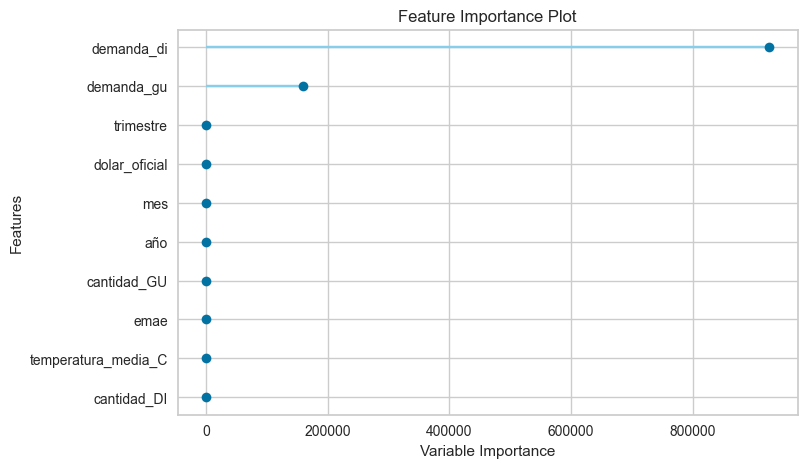

In [344]:
#Grafica de caracteristicas mas importantes

plot_model(model, plot = 'feature')

In [345]:
# ensemble model
ensemble_model(model)

BaggingRegressor(base_estimator=Lars(random_state=1122), random_state=1122)

In [346]:
# generate predictions on the original dataset
predictions = predict_model(model, data=mergedData)# add a date column in the dataset
predictions

,fecha,demanda_gu,demanda_di,cantidad_GU,cantidad_DI,emae,temperatura_media_C,dolar_oficial,mes,año,trimestre,demanda_total,prediction_label
0,2012-01-01,2017838.250,8786862.0,464,660,136.194077,26.261290,4.320161,1,2012,1,10804700.0,1.080470e+07
1,2012-02-01,2023988.125,8061564.0,464,670,132.360519,24.848276,4.347241,2,2012,1,10085552.0,1.008555e+07
2,2012-03-01,2233692.500,7941672.5,466,666,147.441010,21.696774,4.356097,3,2012,1,10175365.0,1.017536e+07
3,2012-04-01,2060515.250,6908553.0,466,670,145.520279,18.090000,4.398100,4,2012,2,8969068.0,8.969068e+06
4,2012-05-01,2188343.000,7408929.0,469,668,157.404190,16.887096,4.450226,5,2012,2,9597272.0,9.597272e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2023-04-01,1928987.000,8117214.5,456,732,149.097656,18.410000,215.790329,4,2023,2,10046201.0,1.004620e+07
136,2023-05-01,1994906.125,8820579.0,458,815,153.848679,16.409678,231.168716,5,2023,2,10815486.0,1.081549e+07
137,2023-06-01,2038714.250,10033118.0,458,819,151.849503,16.309092,248.363327,6,2023,2,12071833.0,1.207183e+07
138,2023-07-01,1878710.375,10598560.0,458,819,149.146866,12.464516,266.024200,7,2023,3,12477271.0,1.247727e+07


In [347]:
fig = px.line(predictions, x='fecha', y=["demanda_total", "prediction_label"], template = 'plotly_dark')# add a vertical rectange for test-set separation
fig.add_vrect(x0="2022-12-01", x1="2023-06-11", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

In [348]:
final_best = finalize_model(model)

In [316]:
mergedData.columns

Index(['fecha', 'demanda_total', 'demanda_gu', 'demanda_di', 'cantidad_GU',
       'cantidad_DI', 'emae', 'temperatura_media_C', 'dolar_oficial', 'mes',
       'año', 'trimestre'],
      dtype='object')

In [317]:
mergedProjectedData.columns = ['fecha', 'demanda_gu', 'demanda_di', 'cantidad_GU',
       'cantidad_DI', 'temperatura_media_C', 'emae', 'dolar_oficial', 'mes',
       'año', 'trimestre']
mergedProjectedData

,fecha,demanda_gu,demanda_di,cantidad_GU,cantidad_DI,temperatura_media_C,emae,dolar_oficial,mes,año,trimestre
0,2023-09-01,1.971284e+06,9.119698e+06,452.209837,403.442964,16.375503,148.412804,350.008333,9,2023,3
1,2023-10-01,2.084874e+06,9.270291e+06,452.832475,476.132275,18.603672,153.088690,350.005000,10,2023,4
2,2023-11-01,2.067591e+06,9.287445e+06,452.304571,475.479651,22.701992,152.298041,352.641000,11,2023,4
3,2023-12-01,1.991204e+06,1.073235e+07,452.896460,499.978383,25.467587,149.813142,359.265710,12,2023,4
4,2024-01-01,1.933013e+06,1.137850e+07,452.600965,462.002656,26.891795,144.647208,366.149194,1,2024,1
5,2024-02-01,1.879603e+06,1.026920e+07,452.888067,373.408453,26.014264,140.858211,372.941207,2,2024,1
6,2024-03-01,2.052508e+06,9.945260e+06,452.893179,416.117917,23.481226,158.230811,379.903968,3,2024,1
7,2024-04-01,1.943594e+06,8.904857e+06,452.594790,456.405803,20.125067,157.222102,387.783267,4,2024,2
8,2024-05-01,2.023635e+06,9.963776e+06,453.620673,455.365800,16.392082,171.735812,396.681323,5,2024,2
9,2024-06-01,1.954035e+06,1.090232e+07,452.250233,486.801403,13.090058,165.420599,406.263000,6,2024,2


In [349]:
predictions_future = predict_model(final_best, mergedProjectedData)
predictions_future

,fecha,demanda_gu,demanda_di,cantidad_GU,cantidad_DI,temperatura_media_C,emae,dolar_oficial,mes,año,trimestre,prediction_label
0,2023-09-01,1971284.375,9119698.0,452.209839,403.442963,16.375504,148.412811,350.008331,9,2023,3,1.109098e+07
1,2023-10-01,2084874.500,9270291.0,452.832489,476.132263,18.603672,153.088684,350.005005,10,2023,4,1.135517e+07
2,2023-11-01,2067590.875,9287445.0,452.304565,475.479645,22.701992,152.298035,352.640991,11,2023,4,1.135504e+07
3,2023-12-01,1991203.875,10732353.0,452.896454,499.978394,25.467587,149.813141,359.265717,12,2023,4,1.272356e+07
4,2024-01-01,1933012.750,11378499.0,452.600952,462.002655,26.891796,144.647202,366.149200,1,2024,1,1.331151e+07
5,2024-02-01,1879603.250,10269204.0,452.888062,373.408447,26.014263,140.858215,372.941193,2,2024,1,1.214881e+07
6,2024-03-01,2052507.875,9945260.0,452.893188,416.117920,23.481226,158.230804,379.903961,3,2024,1,1.199777e+07
7,2024-04-01,1943594.125,8904857.0,452.594788,456.405792,20.125067,157.222107,387.783264,4,2024,2,1.084845e+07
8,2024-05-01,2023634.875,9963776.0,453.620667,455.365814,16.392082,171.735809,396.681335,5,2024,2,1.198741e+07
9,2024-06-01,1954034.750,10902323.0,452.250244,486.801392,13.090057,165.420593,406.263000,6,2024,2,1.285636e+07


In [350]:
concat_df = pd.concat([mergedData,predictions_future], axis=0)
concat_df.reset_index(drop=True, inplace=True)
concat_df

,fecha,demanda_total,demanda_gu,demanda_di,cantidad_GU,cantidad_DI,emae,temperatura_media_C,dolar_oficial,mes,año,trimestre,prediction_label
0,2012-01-01,1.080470e+07,2017838.237,8.786862e+06,464.000000,660.000000,136.194081,26.261290,4.320161,1,2012,1,NaN
1,2012-02-01,1.008555e+07,2023988.130,8.061564e+06,464.000000,670.000000,132.360526,24.848276,4.347241,2,2012,1,NaN
2,2012-03-01,1.017537e+07,2233692.414,7.941673e+06,466.000000,666.000000,147.441016,21.696774,4.356097,3,2012,1,NaN
3,2012-04-01,8.969068e+06,2060515.240,6.908553e+06,466.000000,670.000000,145.520278,18.090000,4.398100,4,2012,2,NaN
4,2012-05-01,9.597272e+06,2188343.073,7.408929e+06,469.000000,668.000000,157.404184,16.887097,4.450226,5,2012,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2026-04-01,NaN,2055488.875,9.404195e+06,449.492584,493.633209,171.156052,20.746960,652.910034,4,2026,2,1.145968e+07
172,2026-05-01,NaN,2091431.250,1.040757e+07,449.912720,504.124237,183.065308,16.689564,666.625305,5,2026,2,1.249900e+07
173,2026-06-01,NaN,2014735.250,1.152141e+07,449.418884,501.625336,175.418579,14.007298,681.546448,6,2026,2,1.353615e+07
174,2026-07-01,NaN,2023477.500,1.223041e+07,449.448975,508.929932,168.401886,12.913345,696.669067,7,2026,3,1.425389e+07


In [351]:
fig = px.line(concat_df, x=concat_df.fecha, y=["demanda_total", "prediction_label"], template = 'plotly_dark')
fig.show()

In [352]:
fig = px.line(predictions_future, x=predictions_future.fecha, y=["prediction_label"], title="Pronóstico de la demanda eléctrica")
fig.update_xaxes(title_text='Fecha')  # Etiqueta y ubicación de los ticks en el eje x
fig.update_yaxes(title_text='Demanda en MWH')  # Etiqueta y ubicación de los ticks en el eje y
fig.show()

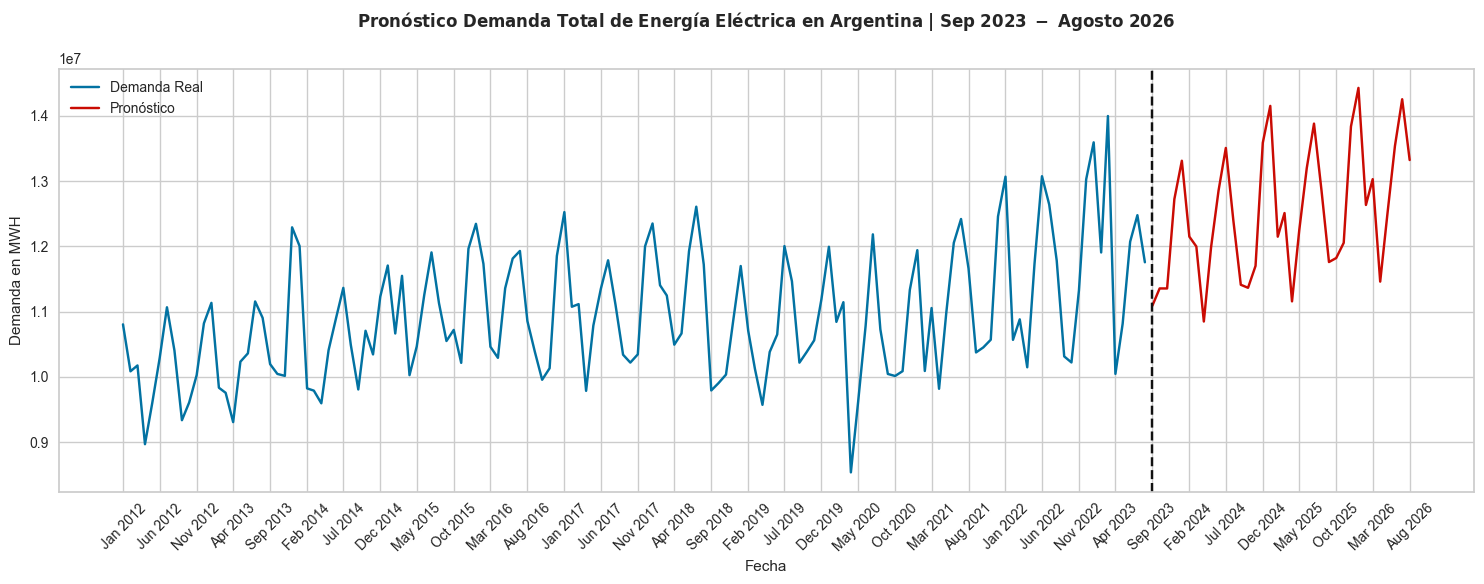

In [385]:
# Crear el gráfico de serie de tiempo
figure, ax = plot.subplots(figsize=(15, 6))  # Tamaño de la figura
plot.plot(concat_df['fecha'], concat_df['demanda_total'], linestyle='-', color='b', label='Demanda Real')
plot.plot(predictions_future['fecha'], predictions_future['prediction_label'], linestyle='-', color='r', label='Pronóstico')

# Personalizar el gráfico
plot.title(r'$\mathbf{Pronóstico\ Demanda\ Total\ de\ Energía\ Eléctrica\ en\ Argentina\ | \ Sep \ 2023 \ - \ Agosto \ 2026}$', pad=30)
plot.xlabel('Fecha')
plot.ylabel('Demanda en MWH')
plot.grid(True)

# Configurar el intervalo de las etiquetas del eje x (por ejemplo, cada año)
plot.xticks(concat_df['fecha'][::5], concat_df['fecha'].dt.strftime('%b %Y')[::5], rotation=45)

# Mostrar una leyenda
plot.legend()

# Mostrar el gráfico
plot.tight_layout() 

#Trazar linea vertical en grafico
plot.axvline(x=pd.to_datetime('2023-09-01'), color='k', linestyle='--')

 # Para ajustar el diseño y evitar cortes en etiquetas
plot.show()

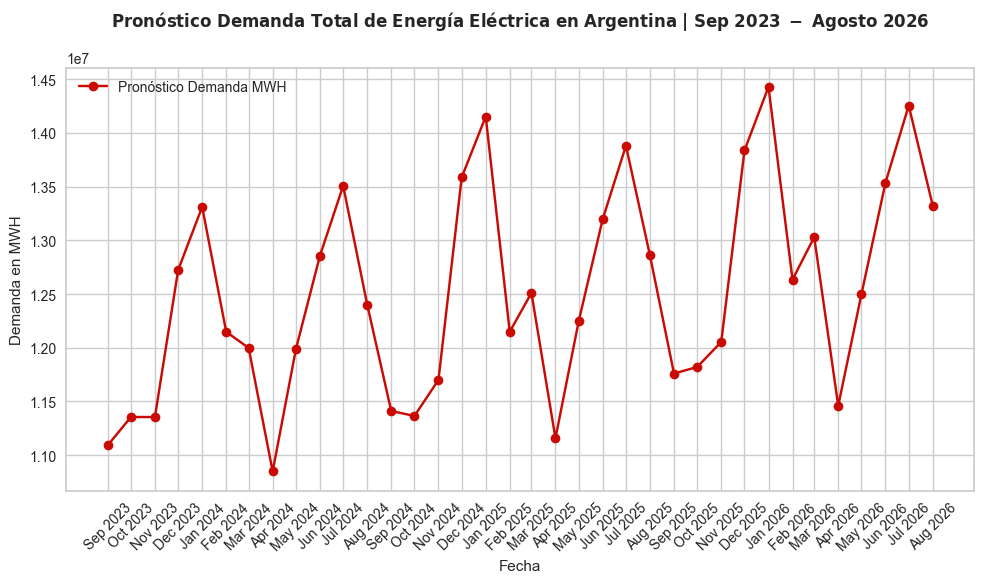

In [386]:

# Crear el gráfico de serie de tiempo
plot.figure(figsize=(10, 6))  # Tamaño de la figura
plot.plot(predictions_future['fecha'], predictions_future['prediction_label'], marker='o', linestyle='-', color='r', label='Pronóstico Demanda MWH')

# Personalizar el gráfico
plot.title(r'$\mathbf{Pronóstico\ Demanda\ Total\ de\ Energía\ Eléctrica\ en\ Argentina\ | \ Sep \ 2023 \ - \ Agosto \ 2026}$', pad=30)
plot.xlabel('Fecha')
plot.ylabel('Demanda en MWH')
plot.grid(True)

# Configurar el intervalo de las etiquetas del eje x (por ejemplo, cada año)
plot.xticks(predictions_future['fecha'][::1], predictions_future['fecha'].dt.strftime('%b %Y')[::1], rotation=45)

# Mostrar el gráfico
plot.tight_layout() 

# Mostrar una leyenda
plot.legend()

# Mostrar el gráfico
plot.tight_layout()  # Para ajustar el diseño y evitar cortes en etiquetas
plot.show()

In [389]:
#Exporto solo el que tiene las predicciones
predictions_future.to_excel(r"./PRONOSTICO_FINAL.xlsx")
#Exporto el que tiene todo, lo real + prediccion
concat_df.to_excel(r"./PRONOSTICO_FINAL_CON_TODO.xlsx")